In [1066]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [1067]:
train_data = pd.read_csv("../input/train.csv")
test_data = pd.read_csv("../input/test.csv")

In [1068]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

In [1069]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The count of each column is not consisent across of columns this suggests there is likely some missing data or null values

In [1070]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We see that 3 columns have null values. Let's deal with this first

In [1071]:
train_data['Age'].fillna(train_data['Age'].median(),inplace=True)

In [1072]:
def convert_age(age):
    if age <= 33:
        return 1
    elif age > 33 and age <= 66:
        return 2
    else:
        return 3
    
train_data["Age"] = train_data["Age"].apply(convert_age)

In [1073]:
p = {1:'1st',2:'2nd',3:'3rd'} 
train_data['Age'] = train_data['Age'].map(p)

In [1074]:
train_data['Embarked'].fillna(train_data['Embarked'].value_counts().index[0], inplace=True)

In [1075]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [1076]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Note that we have more males than females on the ship

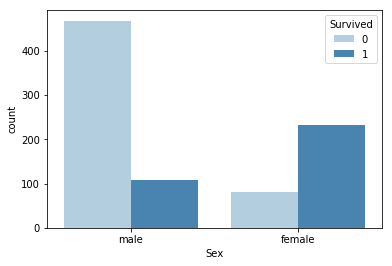

In [1077]:
sns.countplot(x = "Sex", hue ="Survived",data = train_data, palette = "Blues");

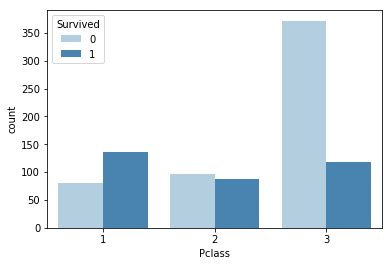

In [1078]:
sns.countplot(x = "Pclass", hue ="Survived",data = train_data, palette = "Blues");

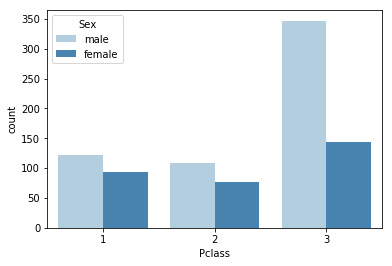

In [1079]:
sns.countplot(x = "Pclass", hue ="Sex",data = train_data, palette = "Blues")

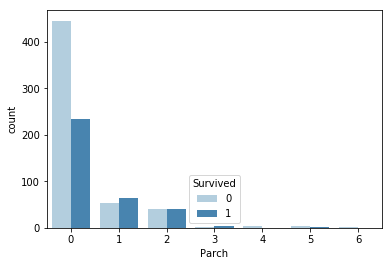

In [1080]:
sns.countplot(x = "Parch", hue ="Survived",data = train_data, palette = "Blues")

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


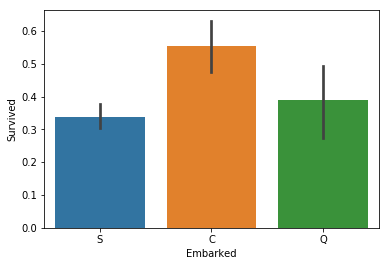

In [1081]:
sns.barplot(x = "Embarked", y = "Survived", data = train_data)

In [1082]:
features = ["Pclass","Sex","Age","Fare","SibSp","Parch","Embarked"]
y = train_data["Survived"]
train_data = train_data[features]

In [1083]:
p = {1:'1st',2:'2nd',3:'3rd'} 
train_data['Pclass'] = train_data['Pclass'].map(p)

In [1084]:
categorical_df = train_data[['Pclass','Sex','Age',"SibSp","Parch",'Embarked']]
one_hot_encode = pd.get_dummies(categorical_df,drop_first=True) 
train_data = train_data.drop(['Pclass','Sex','Age',"SibSp","Parch",'Embarked'],axis=1)
train_data = pd.concat([train_data,one_hot_encode],axis=1)

In [1085]:
X = train_data
train_X, test_X, train_y, test_y = train_test_split(X,y,random_state = 0)

# Training Model

In [1086]:
clf = RandomForestClassifier()
clf.fit(train_X,train_y)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [1087]:
pred = clf.predict(test_X)

In [1088]:
from sklearn import metrics
metrics.accuracy_score(test_y, pred)

0.8071748878923767

# Kaggle Submission

In [1089]:
#test_data.isnull().sum()

In [1090]:
#my_submission = pd.DataFrame({'PassengerId': testingData.PassengerId, 'Survived': pred})

In [1091]:
#my_submission.to_csv('submission.csv', index=False)